In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load books dataframe
books = pd.read_csv('data/books_comics_cleaned.csv')
books.head()

,book_id,text_reviews_count,average_rating,similar_books,description,authors,num_pages,publication_year,ratings_count,title
0,13571772,5,4.28,"['13590139', '105963', '207585', '10503130', '...",The questions plaguing Captain America's dream...,['37450'],146.0,2012.0,51,Captain America: Winter Soldier (The Ultimate ...
1,35452242,1,4.05,[],The fight for Jason Delgado's life and soul be...,"['16209952', '853385']",NaN,NaN,6,Bounty Hunter 4/3: My Life in Combat from Mari...
2,707611,6,4.06,[],These are the stories that catapulted Superman...,"['81563', '89537']",272.0,1997.0,51,"Superman Archives, Vol. 2"
3,27036536,9,4.15,[],PRODUCT DESCRIPTION: The first new volume of G...,"['14965', '3188368', '131836', '7507599']",224.0,2016.0,39,"War Stories, Volume 3"
4,11827783,26,3.16,"['6651573', '8835785', '15060759', '9466897', ...",Sir Arthur Conan Doyle's dauntless detective r...,"['61231', '4980321']",144.0,2011.0,114,Sherlock Holmes: Year One


In [4]:
display(books.describe().T)

,count,mean,std,min,25%,50%,75%,max
book_id,33925.0,1.599940e+07,1.088337e+07,450.0,6250655.00,17670038.00,25428695.00,36494299.0
text_reviews_count,33925.0,3.833067e+01,1.882732e+02,0.0,3.00,8.00,23.00,10057.0
average_rating,33925.0,3.915122e+00,4.140706e-01,0.0,3.67,3.97,4.22,5.0
num_pages,25461.0,1.731259e+02,1.657700e+02,0.0,100.00,160.00,204.00,8124.0
publication_year,27521.0,2.009723e+03,2.502394e+01,13.0,2008.00,2012.00,2015.00,2997.0
ratings_count,33925.0,7.967503e+02,5.095774e+03,0.0,25.00,82.00,319.00,406669.0


In [5]:
books['count_similar_books'] = [len(x) for x in books['similar_books']]

In [6]:
display(books.describe().T)

,count,mean,std,min,25%,50%,75%,max
book_id,33925.0,1.599940e+07,1.088337e+07,450.0,6250655.00,17670038.00,25428695.00,36494299.0
text_reviews_count,33925.0,3.833067e+01,1.882732e+02,0.0,3.00,8.00,23.00,10057.0
average_rating,33925.0,3.915122e+00,4.140706e-01,0.0,3.67,3.97,4.22,5.0
num_pages,25461.0,1.731259e+02,1.657700e+02,0.0,100.00,160.00,204.00,8124.0
publication_year,27521.0,2.009723e+03,2.502394e+01,13.0,2008.00,2012.00,2015.00,2997.0
ratings_count,33925.0,7.967503e+02,5.095774e+03,0.0,25.00,82.00,319.00,406669.0
count_similar_books,33925.0,6.512183e+01,7.514805e+01,2.0,2.00,2.00,132.00,216.0


In [7]:
# What % of num_pages are non-null?
books.num_pages.count()/len(books.num_pages)

# It's likely the num_pages isn't too significant, but will fill with median to see if should stay
books['num_pages'].fillna(books['num_pages'].median(), inplace=True)

# Fix data type
books['num_pages']= books['num_pages'].astype(int)

In [8]:
# Why is there a 2997 year & a 13?
display(books[books['publication_year']==2997])
display(books[books['publication_year']==13])

,book_id,text_reviews_count,average_rating,similar_books,description,authors,num_pages,publication_year,ratings_count,title,count_similar_books
27106,1740329,5,4.25,"['106069', '22374', '96358', '95406', '107032'...",This masterpiece of modern comics storytelling...,"['15085', '12740', '29578']",160,2997.0,33,Batman: The Dark Knight Returns,125


,book_id,text_reviews_count,average_rating,similar_books,description,authors,num_pages,publication_year,ratings_count,title,count_similar_books
13619,18279387,28,2.11,[],Manga,"['3979033', '6643355']",156,13.0,56,One is Enough,2


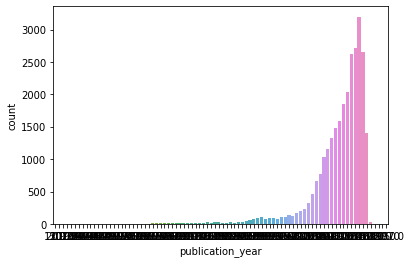

In [9]:
# Examine spread of publication years visually
sns.countplot(x='publication_year', data=books)

In [10]:
# Filter for anything before 1950 or later than 2020
year_mask = (books.publication_year < 1950) | (books.publication_year > 2020)
outliers = books[year_mask]
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 193 to 30984
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   book_id              24 non-null     int64  
 1   text_reviews_count   24 non-null     int64  
 2   average_rating       24 non-null     float64
 3   similar_books        24 non-null     object 
 4   description          18 non-null     object 
 5   authors              24 non-null     object 
 6   num_pages            24 non-null     int32  
 7   publication_year     24 non-null     float64
 8   ratings_count        24 non-null     int64  
 9   title                24 non-null     object 
 10  count_similar_books  24 non-null     int64  
dtypes: float64(2), int32(1), int64(4), object(4)
memory usage: 2.2+ KB


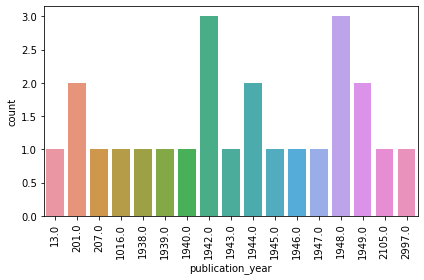

In [11]:
# Let's see where these are
sns.countplot(x='publication_year', data=outliers)
plt.xticks(rotation=90)
plt.tight_layout()

I'm going to assume 2997 is a typo and meant to be 1997 - a quick Google search shows there is indeed a 1997 comic by this name.

The 2105 is most likely meant to be 2015.

For the years in the 30s and 40s, that seems appropriate. There would have been comics available then.

The other early ones will replace with the median.

In [12]:
# Confirm 2105 hunch and replace
display(books[books['publication_year']==2105])

,book_id,text_reviews_count,average_rating,similar_books,description,authors,num_pages,publication_year,ratings_count,title,count_similar_books
22832,26514764,3,3.82,[],Based on the true story of the world's most fa...,"['14339651', '452017', '14339652']",160,2105.0,22,Executive Outcomes,2


In [13]:
# Google search confirms that hunch - fix it
books['publication_year'].replace(2105, 2015, inplace=True)

In [14]:
# Fix 2997 year
books['publication_year'].replace(2997, 1997, inplace=True)

# Replace the very early years with NaN
books['publication_year'].replace([13,201, 207, 1016], np.nan)

0        2012.0
1           NaN
2        1997.0
3        2016.0
4        2011.0
          ...  
33920    2016.0
33921    2008.0
33922    2011.0
33923    2016.0
33924    2014.0
Name: publication_year, Length: 33925, dtype: float64

In [15]:
# Replace missing values with median year
books['publication_year'].fillna(books['publication_year'].median(), inplace=True)

# Fix numeric data type
books['publication_year'] = books['publication_year'].astype(int)

NOTE TO SELF - should probably move the above to the "Data Wrangling" notebook

In [16]:
display(books.describe().T)

,count,mean,std,min,25%,50%,75%,max
book_id,33925.0,1.599940e+07,1.088337e+07,450.0,6250655.00,17670038.00,25428695.00,36494299.0
text_reviews_count,33925.0,3.833067e+01,1.882732e+02,0.0,3.00,8.00,23.00,10057.0
average_rating,33925.0,3.915122e+00,4.140706e-01,0.0,3.67,3.97,4.22,5.0
num_pages,33925.0,1.698511e+02,1.437212e+02,0.0,128.00,160.00,192.00,8124.0
publication_year,33925.0,2.010121e+03,2.190464e+01,13.0,2009.00,2012.00,2014.00,2020.0
ratings_count,33925.0,7.967503e+02,5.095774e+03,0.0,25.00,82.00,319.00,406669.0
count_similar_books,33925.0,6.512183e+01,7.514805e+01,2.0,2.00,2.00,132.00,216.0


In [17]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33925 entries, 0 to 33924
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   book_id              33925 non-null  int64  
 1   text_reviews_count   33925 non-null  int64  
 2   average_rating       33925 non-null  float64
 3   similar_books        33925 non-null  object 
 4   description          30460 non-null  object 
 5   authors              33925 non-null  object 
 6   num_pages            33925 non-null  int32  
 7   publication_year     33925 non-null  int32  
 8   ratings_count        33925 non-null  int64  
 9   title                33925 non-null  object 
 10  count_similar_books  33925 non-null  int64  
dtypes: float64(1), int32(2), int64(4), object(4)
memory usage: 2.6+ MB


In [18]:
books.set_index('book_id', inplace=True)

In [19]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33925 entries, 13571772 to 23363286
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   text_reviews_count   33925 non-null  int64  
 1   average_rating       33925 non-null  float64
 2   similar_books        33925 non-null  object 
 3   description          30460 non-null  object 
 4   authors              33925 non-null  object 
 5   num_pages            33925 non-null  int32  
 6   publication_year     33925 non-null  int32  
 7   ratings_count        33925 non-null  int64  
 8   title                33925 non-null  object 
 9   count_similar_books  33925 non-null  int64  
dtypes: float64(1), int32(2), int64(3), object(4)
memory usage: 2.6+ MB


# Visual EDA
These three columns in particular it will be interesting to look at the spread:
* number of reviews
* number of ratings
* average rating
* count of similar books

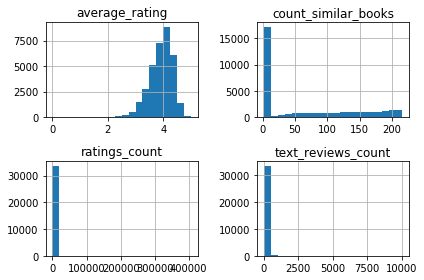

In [20]:
num_cols = ['text_reviews_count', 'average_rating', 'ratings_count', 'count_similar_books']
books[num_cols].hist(bins=20, layout=(2,2))
plt.tight_layout()

It looks like ratings_count and text_reviews_count have some extreme outliers. I'll take a look at the spread with boxplots.

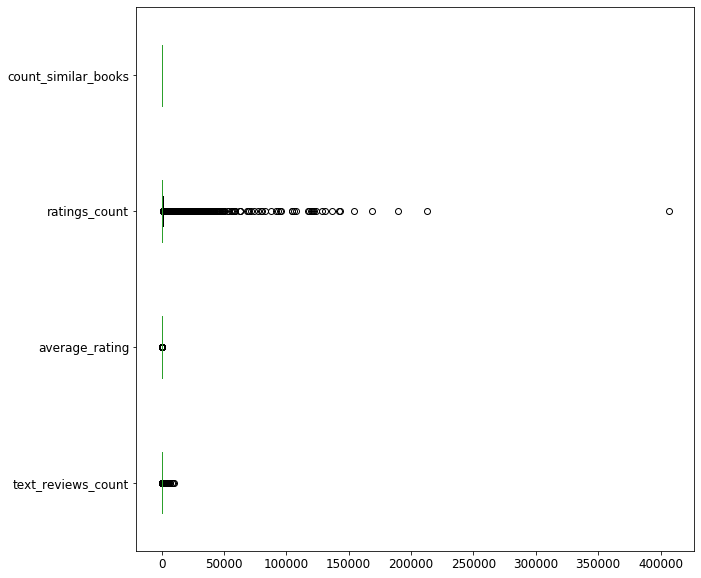

In [21]:
books[num_cols].boxplot(grid=False, vert=False, fontsize=12, figsize=(10,10))

Ratings_count of 400k+ seems pretty extreme when there are around 550k total ratings. Unless it's the most popular of all the comics. 

Let's see...

In [22]:
display(books[books['ratings_count']==406669.0])

,text_reviews_count,average_rating,similar_books,description,authors,num_pages,publication_year,ratings_count,title,count_similar_books
book_id,,,,,,,,,,
472331,10057,4.35,"['25104', '209968', '156530', '21330', '102958...",This Hugo Award-winning graphic novel chronicl...,"['3961', '13285', '106526']",416,2005,406669,Watchmen,67


This was an award-winning graphic novel that was reprinted in 2005. It is possible that a huge % of comic reviwers would have rated this one, being that it is such a classic. I will leave that value in and see how the modelling looks both with/without it.

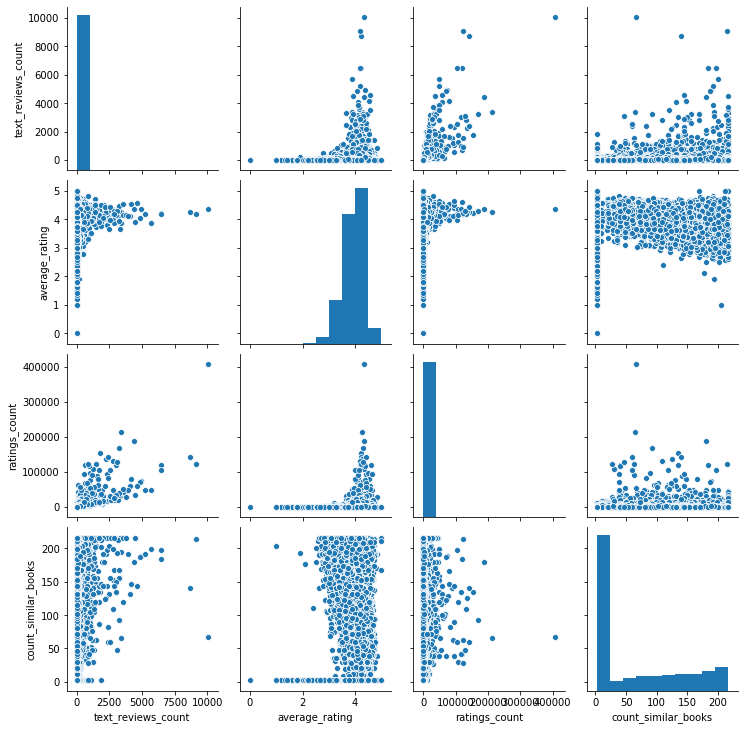

In [23]:
sns.pairplot(books[num_cols])

,text_reviews_count,average_rating,ratings_count,count_similar_books
text_reviews_count,1.000000,0.062531,0.757712,0.169876
average_rating,0.062531,1.000000,0.095271,0.081461
ratings_count,0.757712,0.095271,1.000000,0.087729
count_similar_books,0.169876,0.081461,0.087729,1.000000


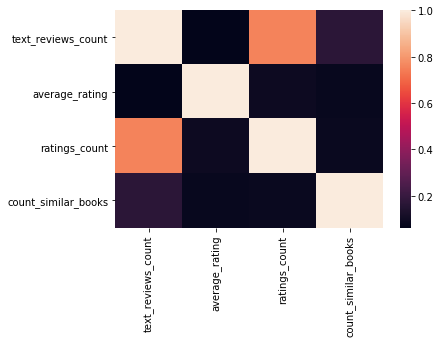

In [24]:
display(books[num_cols].corr())
sns.heatmap(books[num_cols].corr())

The only columns that have much of any correlation are the numbers of ratings and text reviews. Correlation between those two makes sense. For now I will leave both features in, but dropping one of them is an idea to potentially improve future model performance.

## Text (and List) Features

There are several text features that I'll need to extract machine learning-type features from. Also, need to think through how to incorporate the list of authors.

The Authors could be turned into categorical variables and dummy variables created. 

For text (like title, description), can use NLP techniques to extract features.

Will perform these in the next step - Preprocessing

In [42]:
# Create step 3 output
books.to_csv('data/books_step3_output.csv')

# Review Data

Most of the EDA to be done was on the set of books. But now I'll examine the reviews to see what, if anything, should be done here.

After that I'll join the two sets on book_id so we have a tidy set of data that would be ready for modeling.

In [25]:
# Load and check reviews data
reviews = pd.read_csv('data/reviews_comics_cleaned.csv')
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542338 entries, 0 to 542337
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   review_id    542338 non-null  object
 1   user_id      542338 non-null  object
 2   book_id      542338 non-null  int64 
 3   rating       542338 non-null  int64 
 4   review_text  542015 non-null  object
 5   date_added   542338 non-null  object
dtypes: int64(2), object(4)
memory usage: 24.8+ MB


In [26]:
reviews.head()

,review_id,user_id,book_id,rating,review_text,date_added
0,66b2ba840f9bd36d6d27f46136fe4772,dc3763cdb9b2cae805882878eebb6a32,18471619,3,Sherlock Holmes and the Vampires of London \n ...,Thu Dec 05 10:44:25 -0800 2013
1,72f1229aba5a88f9e72f0dcdc007dd22,bafc2d50014200cda7cb2b6acd60cd73,6315584,4,"I've never really liked Spider-Man. I am, howe...",Wed Aug 10 06:06:48 -0700 2016
2,a75309355f8662caaa5e2c92ab693d3f,bafc2d50014200cda7cb2b6acd60cd73,29847729,4,"A very quick introduction, this is coming out ...",Thu Apr 21 07:44:00 -0700 2016
3,c3cc5a3e1d6b6c9cf1c044f306c8e752,bafc2d50014200cda7cb2b6acd60cd73,18454118,5,I've been waiting so long for this. I first st...,Mon Mar 03 17:45:56 -0800 2014
4,cc444be37ab0a42bfb4dd818cb5edd10,bafc2d50014200cda7cb2b6acd60cd73,2239435,4,The only thing more entertaining than this boo...,Wed Apr 03 12:37:48 -0700 2013


I'm not certain I need to keep the dates of the reviews in. I could see a recency factor influencing the model: a user's tastes/preferences may have changed.

I'll explore the dates to see how widely spread they are. I'm not sure how long Goodreads has been around. If it's only a few years then can probably ignore it.

In [30]:
# Was trying to run this:
# reviews['date_added'] = pd.to_datetime(reviews['date_added'], infer_datetime_format=True)
# But taking forever with the large data set.
# All I'm really interested in at this point is how widely spread the years are...will make a 
# year categorical column and use that to explore.

In [34]:
# Create a year column
reviews['year'] = reviews['date_added'].str[-4:]

In [37]:
reviews['year'] = reviews['year'].astype('category')

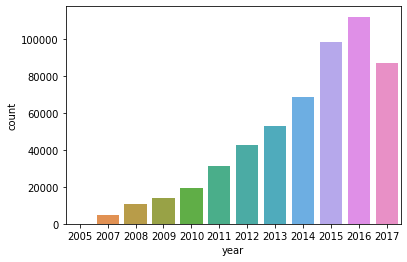

In [38]:
sns.countplot(reviews['year'])

Since there are reviews spread out over a decade, I'll keep the year in for now. It may be useful. But the year suffices, no need to keep entire date.

In [40]:
reviews.drop('date_added', axis=1, inplace=True)
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542338 entries, 0 to 542337
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   review_id    542338 non-null  object  
 1   user_id      542338 non-null  object  
 2   book_id      542338 non-null  int64   
 3   rating       542338 non-null  int64   
 4   review_text  542015 non-null  object  
 5   year         542338 non-null  category
dtypes: category(1), int64(2), object(3)
memory usage: 21.2+ MB


# Text Features

Just like with my books dataframe, I'll do some NLP feature extraction in the next step. For now this dataframe is good to go.

In [43]:
reviews.to_csv('data/reviews_step3_output.csv')